## Imporrt library

In [2]:
# from tensorflow import keras
# # import tensorflow as tf
import pandas as pd
from random import sample
import numpy as np

from itertools import product
from itertools import permutations
from itertools import combinations
import matplotlib.pyplot as plt
from sklearn.metrics import ndcg_score

import os

## Top 6 sequence predictions, Figure S4

### Load predictions

In [ ]:
path = './top6/'

df_pred = pd.read_csv(path +'predictions_sequence_information.csv' , encoding='cp949')
df_smiles = pd.read_csv(path +'smiles.csv' , encoding='cp949')
df_modification = pd.read_csv(path +'information.csv' , encoding='cp949')

df_pred = df_pred.sort_values(by=['ids'])
df_smiles['ids']= np.arange(start=0, stop=len(df_smiles), step=1)

conversion_dict={}
for ii in range(len(df_smiles)):
    conversion_dict[df_smiles.iloc[ii]['ISIS']]=df_smiles.iloc[ii]['ids']
interval=6561

### Choose Seq id 

In [ ]:
seq_id=4

df_target=df_pred[(df_pred['ids']>=seq_id*interval) & (df_pred['ids']<(seq_id+1)*interval)]
df_rank=df_target.sort_values(by=['Preds'])
rank_list=df_rank['ids'].values[::-1]

### Draw histogram

In [ ]:
ido_path = './histogram/'
import matplotlib.pyplot as plt
plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=15)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=14)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=14)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=10) # figure title 폰트 크기


Seqs=['CAAGGCGCTGTGACTTGTG','CTAGACGTGCAAGGCGC','CAAACTCACGGACTGAGG','CGGACTGAGGGATTTGAT','ACTCACGGACTGAGGGATT','CGCTGTGACTTGTGGTC']

proposed_dict=[5619,12180,18830,24759,31863,37881]
conv_dict=[6180,12741,19302,25863,32424,38985]
raw_dict=[6178,12739,19300,25861,32422,38983]

proposed_rank = np.where(rank_list==proposed_dict[seq_id])[0][0]
gapmer_rank = np.where(rank_list==conv_dict[seq_id])[0][0]
raw_rank = np.where(rank_list==raw_dict[seq_id])[0][0]

value_list = df_target['Preds'].values

proposed_gapmer = df_target[df_target['ids']==proposed_dict[seq_id]]['Preds'].values[0]
conv_gapmer = df_target[df_target['ids']==conv_dict[seq_id]]['Preds'].values[0]
raw_gapmer = df_target[df_target['ids']==raw_dict[seq_id]]['Preds'].values[0]

# conv_gapmer
plt.figure(figsize=(8,6))
plt.hist(value_list, density=True, alpha=0.7, color='darkblue',bins=64)

plt.annotate('ASOpt'.format(proposed_rank), xytext=(proposed_gapmer-0.05, proposed_gapmer+3), xy=(proposed_gapmer, proposed_gapmer), xycoords='data', 
        arrowprops=dict(arrowstyle='->', color='yellow', lw=3),fontsize=14)

plt.annotate('Gapmer'.format(gapmer_rank), xytext=(conv_gapmer-0.1, conv_gapmer+3), xy=(conv_gapmer, conv_gapmer), xycoords='data', 
        arrowprops=dict(arrowstyle='->', color='red', lw=3),fontsize=14)

plt.annotate('PS'.format(raw_rank), xytext=(raw_gapmer-0.1, raw_gapmer+3), xy=(raw_gapmer, raw_gapmer), xycoords='data', 
        arrowprops=dict(arrowstyle='->', color='black', lw=3),fontsize=14)

plt.xlabel('ASOptimizer score',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('{}'.format(Seqs[seq_id]),fontsize=20)
plt.show()

## In-silico validation,  Figure S3

### Load predictions

In [ ]:
import pandas as pd

# 첫 번째 데이터프레임 생성
data1 = {'ID': [1, 2, 3, 4],
         'Name1': ['Alice', 'Bob', 'Charlie', 'David']}
df1 = pd.DataFrame(data1)

# 두 번째 데이터프레임 생성
data2 = {'ID': [2, 3, 5],
         'Name2': ['Eve', 'Frank', 'Grace']}
df2 = pd.DataFrame(data2)


In [ ]:
merged_df = pd.merge(df1, df2, on='ID', how='inner')

# 결과 출력
print(merged_df)

In [12]:
insilico_path = './insilico/'

df_pred = pd.read_csv(insilico_path +'predictions.csv' , encoding='cp949')
df_smiles = pd.read_csv(insilico_path +'smiles.csv' , encoding='cp949')
df_exp = pd.read_csv(insilico_path +'information_v2.csv' , encoding='cp949')
# df_exp.rename({'ISIS':'ids'},axis=1,inplace=True)

df_train = pd.read_csv(insilico_path +'train_set_info.csv' , encoding='cp949')
df_test = pd.read_csv(insilico_path +'test_set_info.csv' , encoding='cp949')

In [13]:
df_exp

,ISIS,Target_gene,Cell_line,Density(cells/well),Transfection,ASO_volume(nM),Treatment_Period(hours),Primer_probe_set,Sequence,Modification,...,name,5-Methyl_Location,Condition2,Methyl_Location,Condition1,Base,Base_Location,re-expression(% of Mock),SD,match
0,651966,K-RAS,A431,5000,free uptake,2000.0,24,RTS3496_MGB,CATTTATGTGACTAGA,cEt/5-methylcytosines/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,696039,K-RAS,A431,5000,free uptake,2000.0,24,RTS3496_MGB,CCAGTGTTAAGAGAAC,(S)-cEt/5-methylcytosines/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,716655,K-RAS,A431,5000,free uptake,2000.0,24,RTS3496_MGB,TGTTTATGCAATGTTA,(S)-cEt/5-methylcytosines/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,716765,K-RAS,A431,5000,free uptake,2000.0,24,RTS3496_MGB,CCAGTGTTAAGAGAAC,(S)-cEt/5-methylcytosines/MOE/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,716770,K-RAS,A431,5000,free uptake,2000.0,24,RTS3496_MGB,CCAGTGTTAAGAGAAC,(S)-cEt/5-methylcytosines/MOE/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2448,972190,APOL1,A431,11000,free uptake,40.0,16,RTS35962,TTTTGTAAGTGCAACC,MOE/cEt/5-methylcytosines/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2449,972147,APOL1,A431,11000,free uptake,40.0,16,RTS35962,CGCAATGCTGACTTGG,MOE/cEt/5-methylcytosines/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2450,793406,APOL1,A431,10000,free uptake,40.0,16,RTS35962,GTTCAAAAGCAGCATT,cEt/5-methylcytosines/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2451,793406,APOL1,A431,10000,free uptake,40.0,16,RTS35962,GTTCAAAAGCAGCATT,cEt/5-methylcytosines/deoxy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
rank_ISIS=np.array(list(set(df_pred['ids'].values)))
train_ISIS = np.array(list(set(list(set(df_train['front_id'].values))+list(set(df_train['back_id'].values)))))
test_ISIS = np.array(list(set(list(set(df_test['front_id'].values))+list(set(df_test['back_id'].values)))))

test_id=df_pred['ids'].values
df_test_exp = df_exp[df_exp['ISIS'].isin(test_id)]
df_test_exp = df_test_exp.astype({'ISIS': 'int32'})

unique_seq = df_test_exp[df_test_exp['ISIS'].isin(test_id)]['Sequence'].unique()
unique_train_seq = df_exp[df_exp['ISIS'].isin(train_ISIS)]['Sequence'].unique()
unique_test_seq = df_exp[df_exp['ISIS'].isin(test_ISIS)]['Sequence'].unique()

seqs=[]
for ii in unique_seq:
    if df_test_exp[df_test_exp['Sequence']==ii].ISIS.nunique()>4:
        seqs.append(ii)
print('# of test unique sequences above 4 experiments: {}'.format(len(seqs)))

# of test unique sequences above 4 experiments: 93


In [15]:
def merge_columns(row):
    return tuple(row)

def count_duplicates(row):
    merged_values = df_test_extract['Merged_Column'].tolist()
    return merged_values.count(row)

env_columns=['Target_gene','Cell_line','Density(cells/well)','Transfection','ASO_volume(nM)','Treatment_Period(hours)']

### Get Pearson Corr and Scatter-plot per each sequence

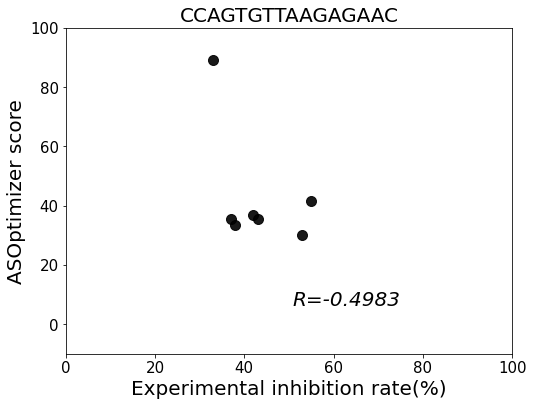

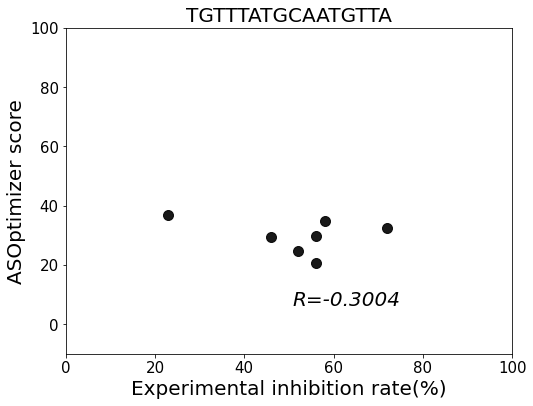

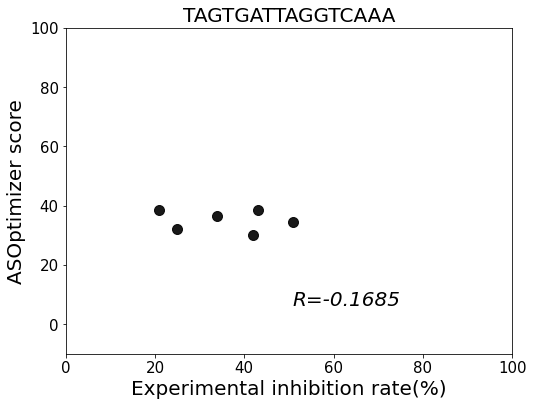

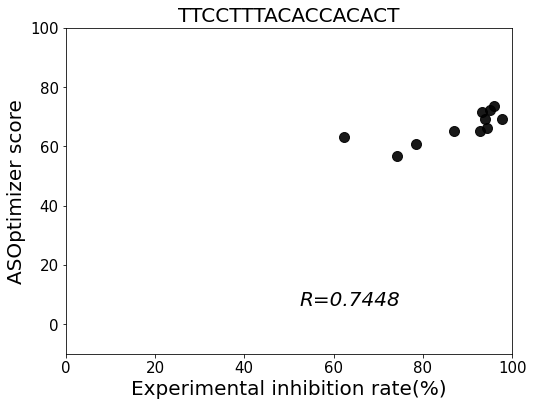

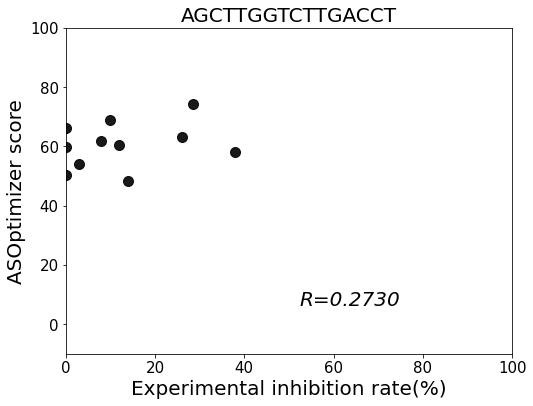

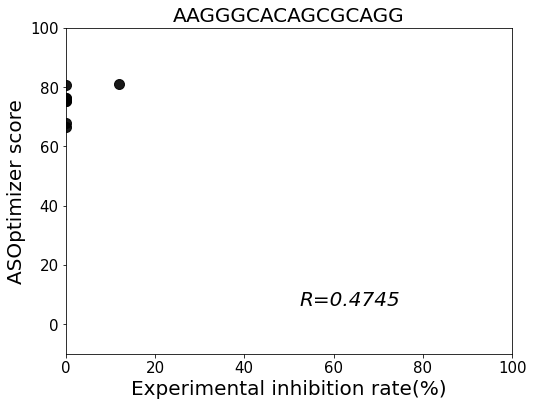

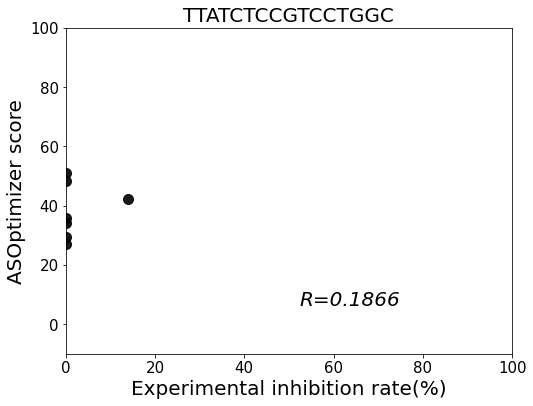

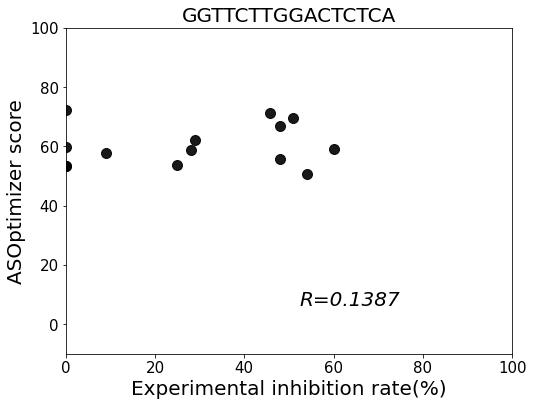

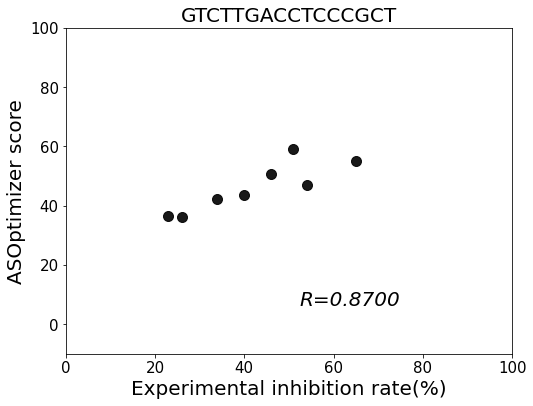

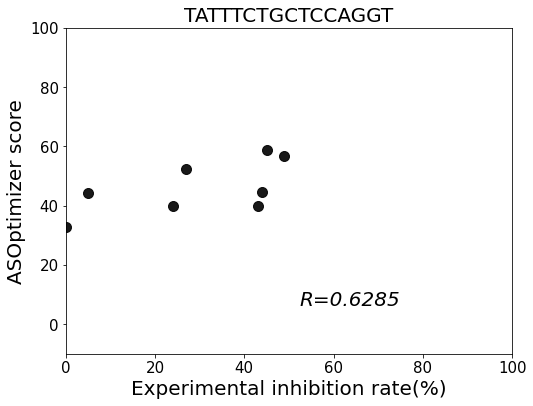

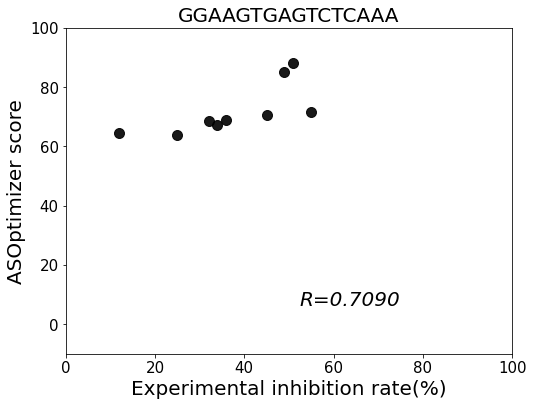

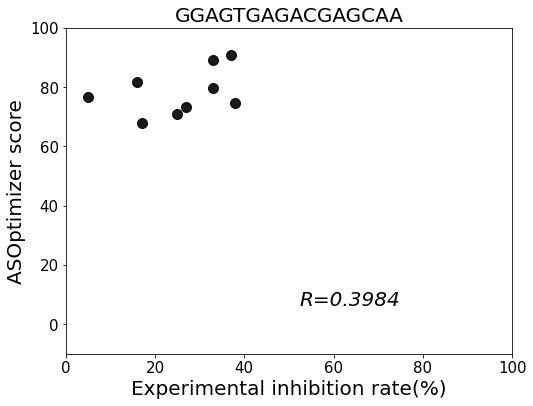

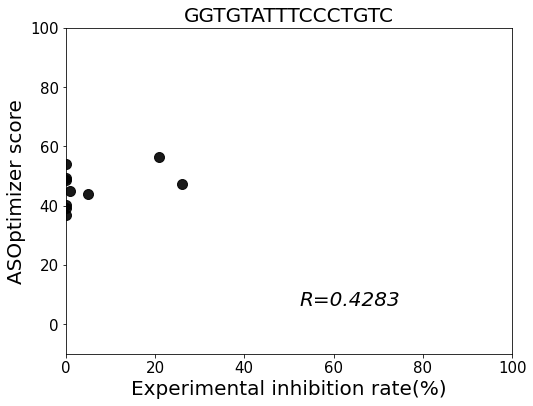

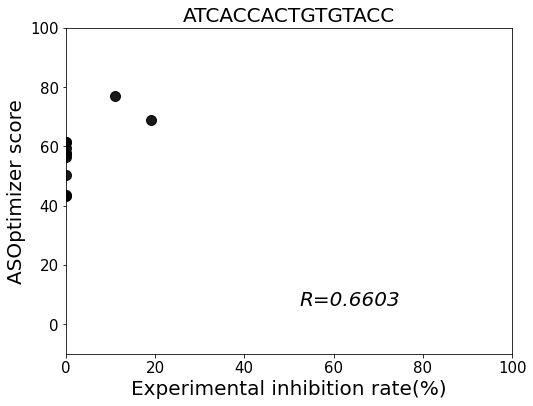

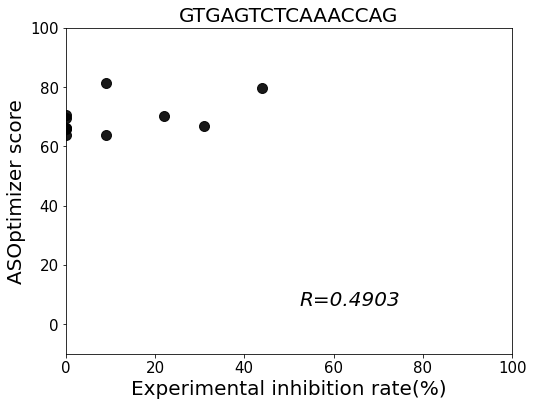

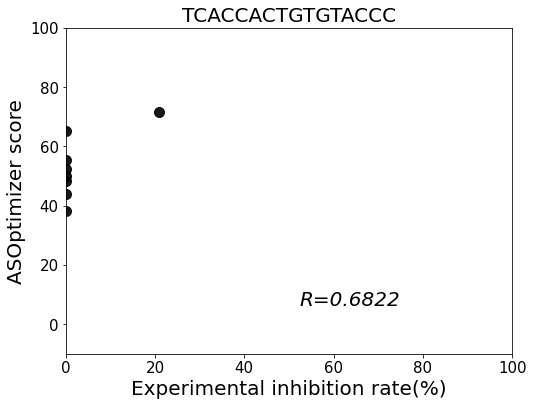

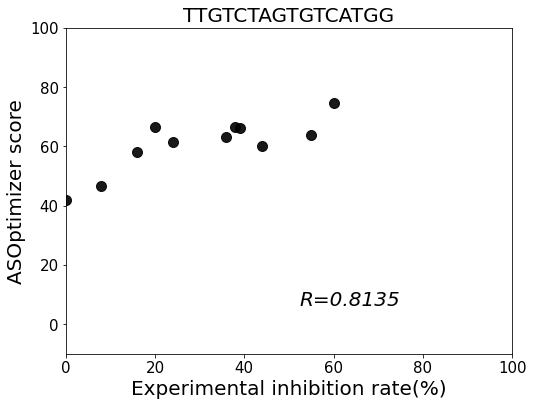

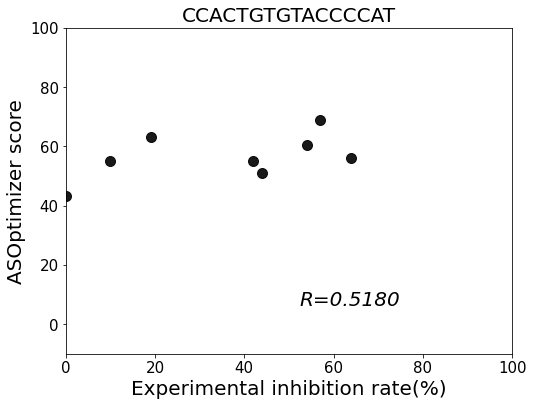

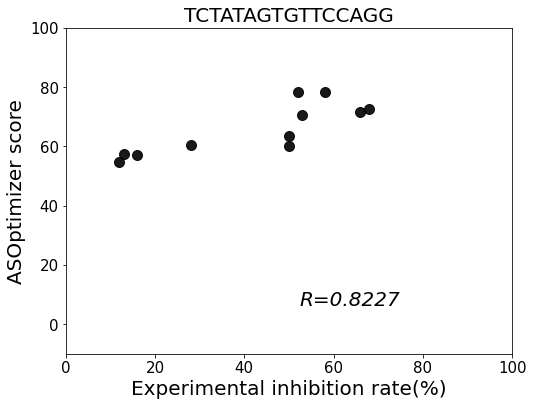

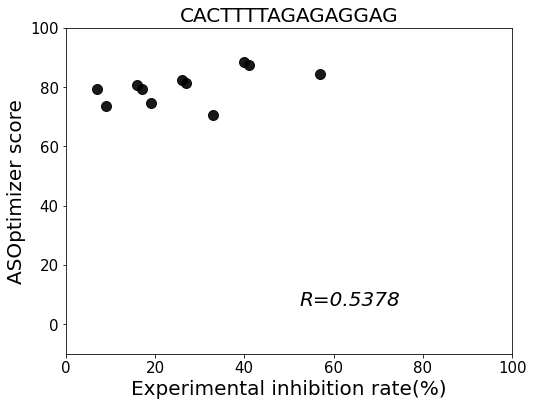

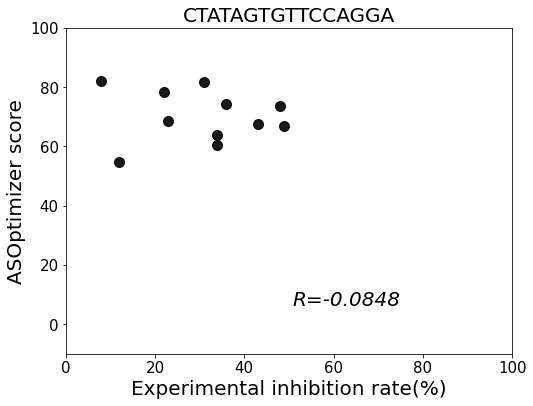

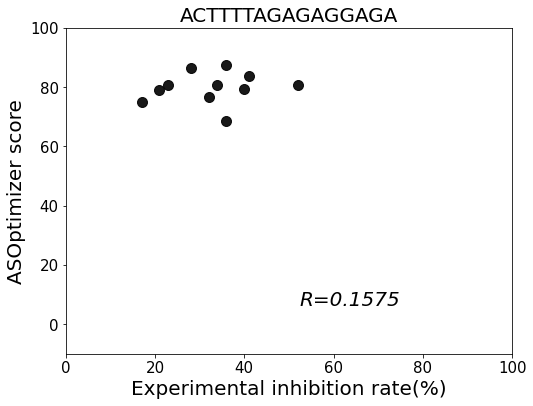

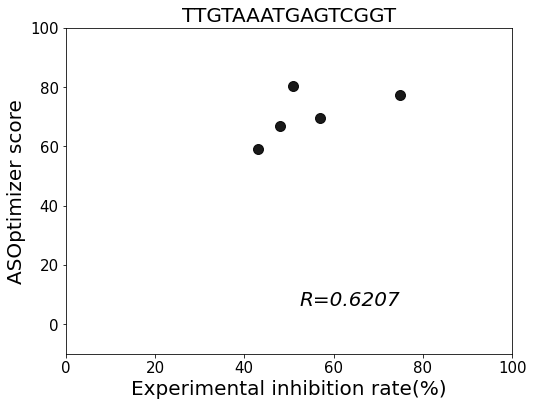

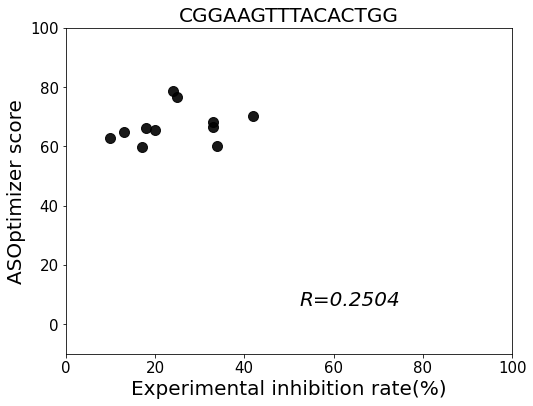

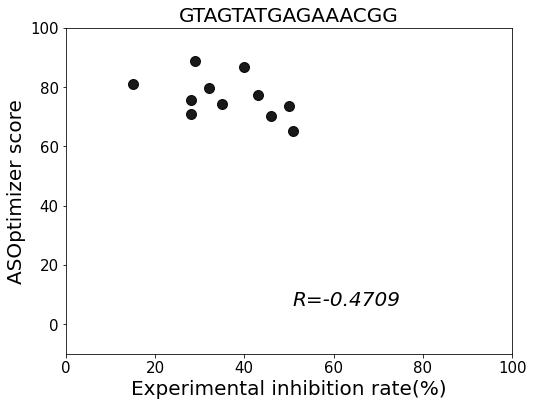

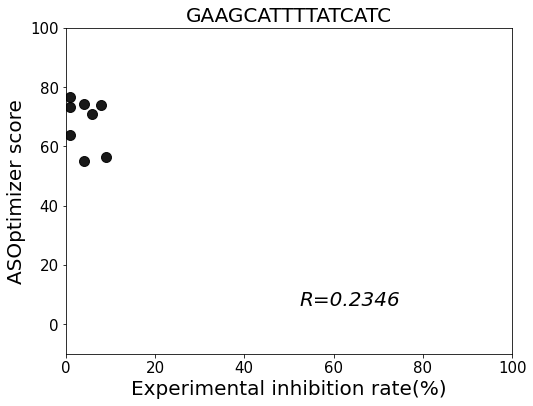

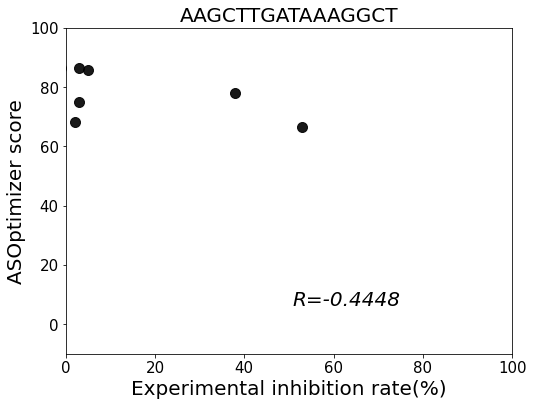

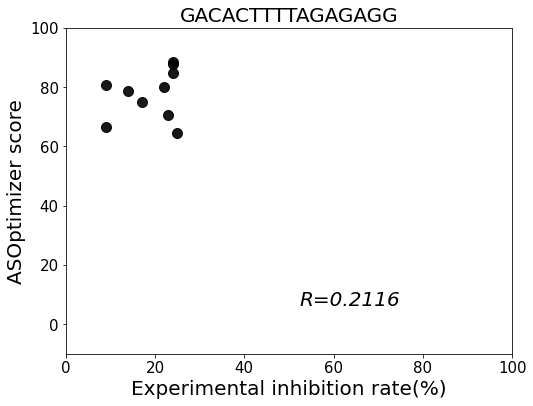

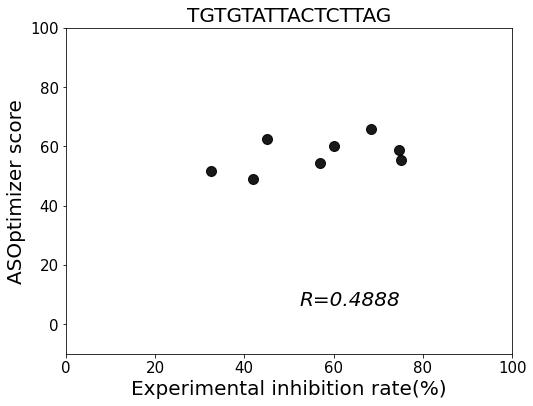

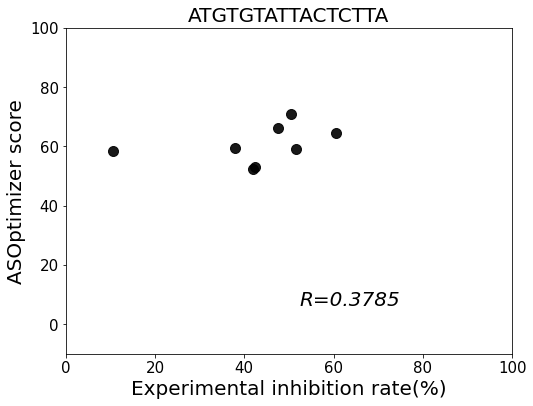

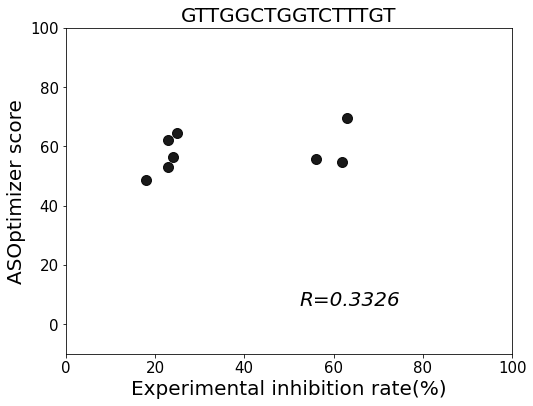

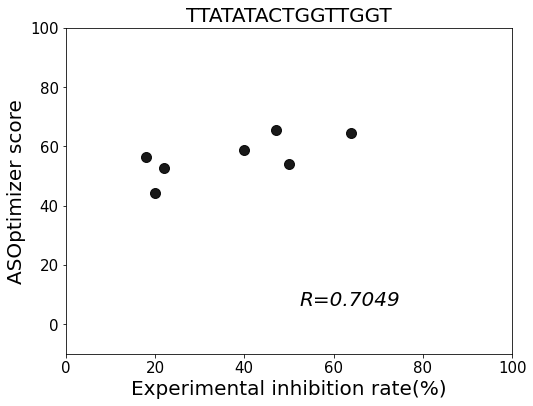

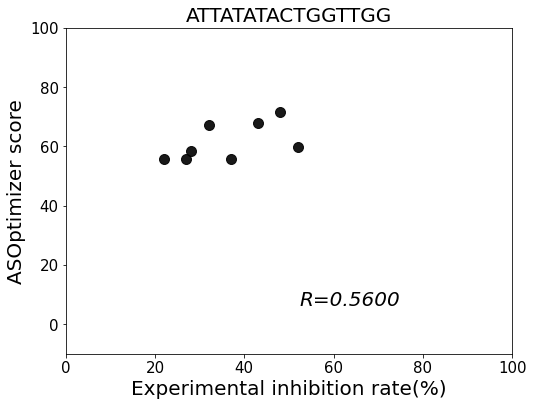

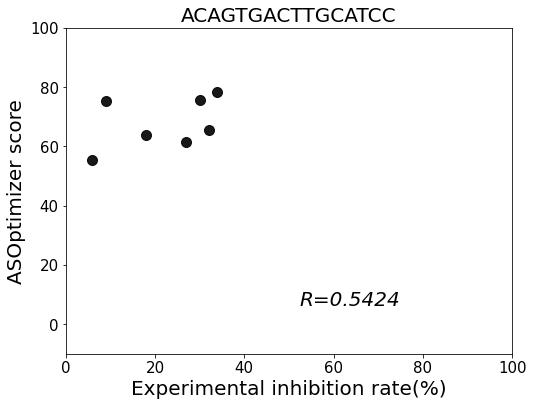

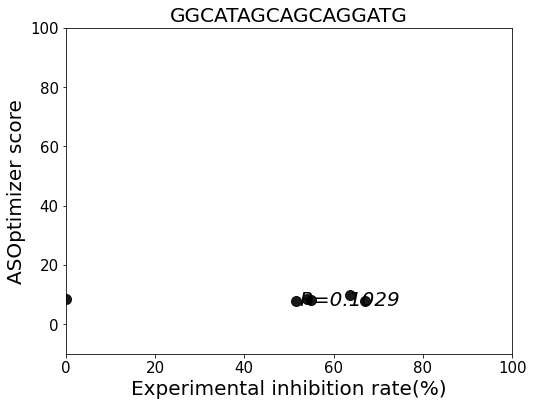

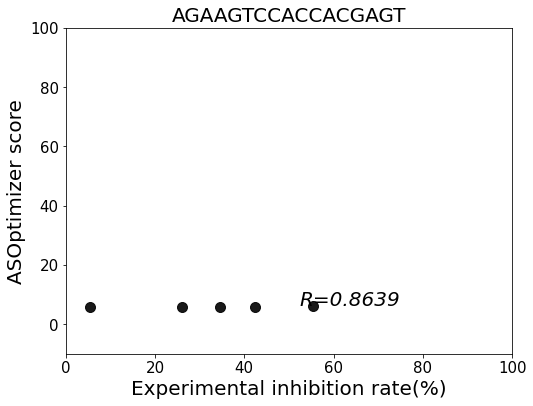

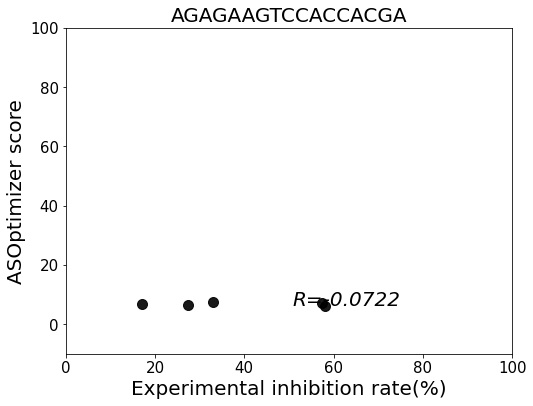

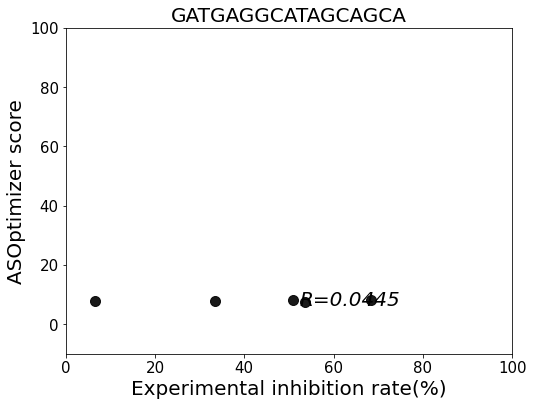

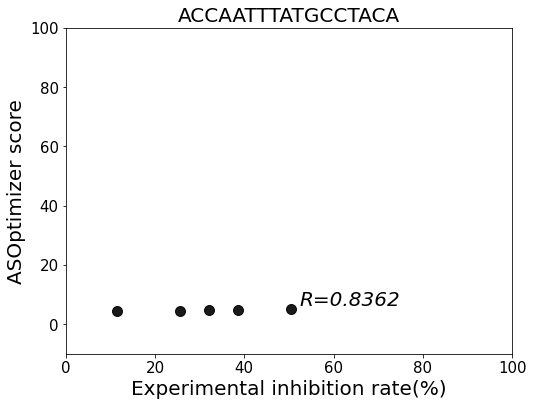

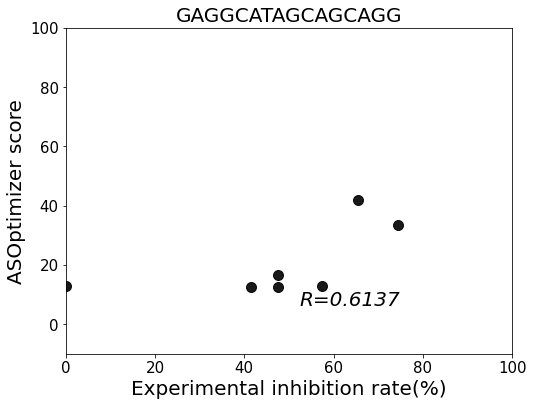

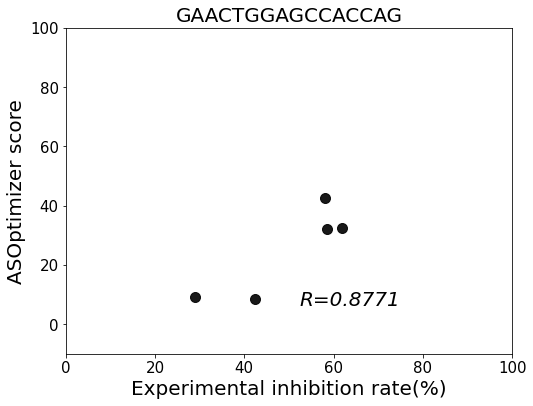

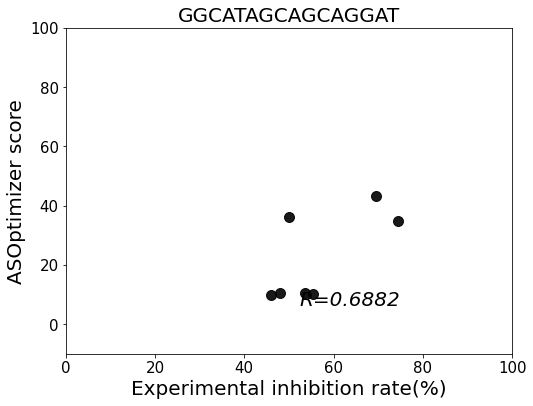

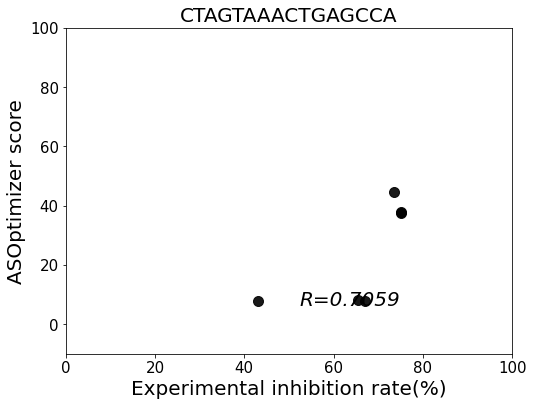

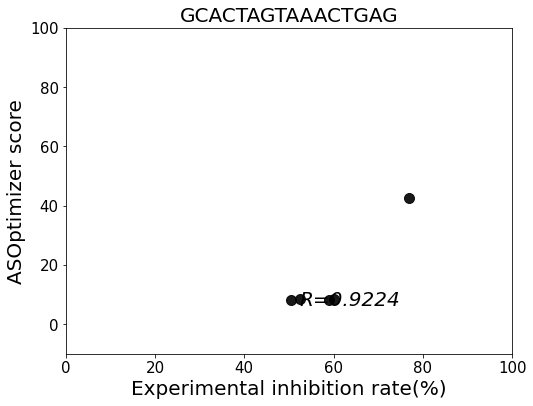

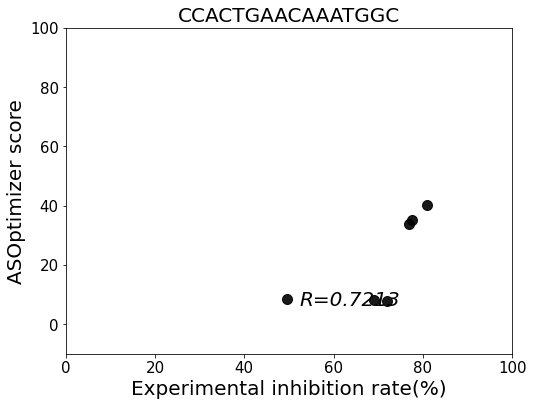

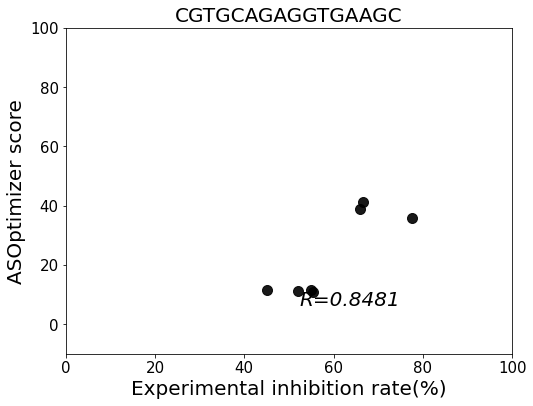

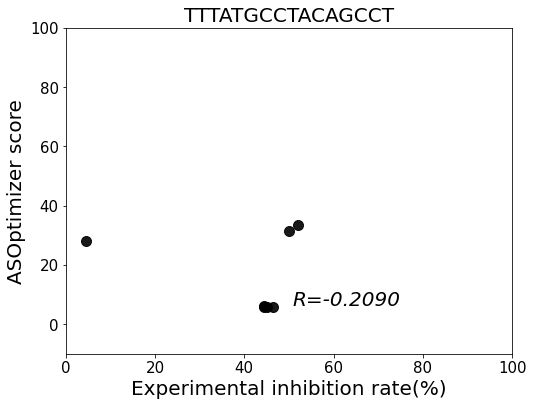

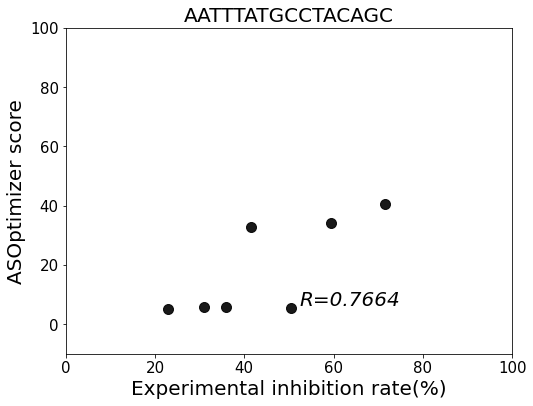

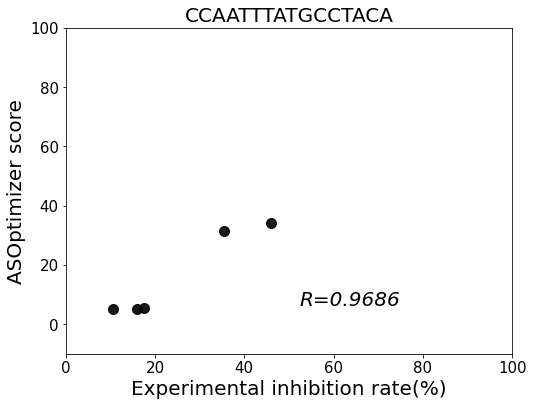

ATTTATGCCTACAGCCT


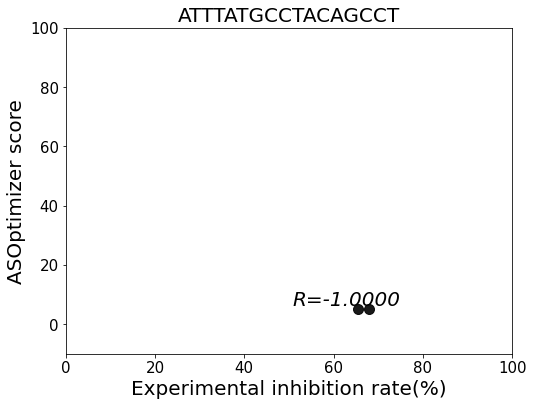

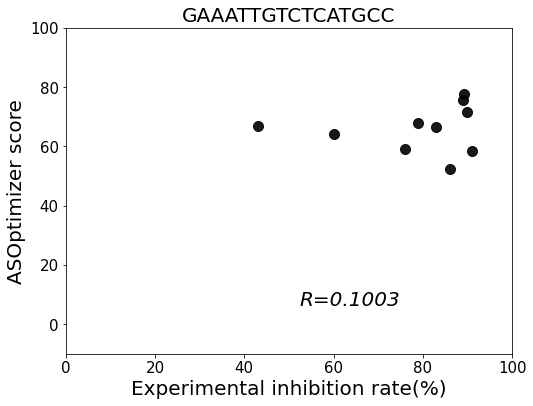

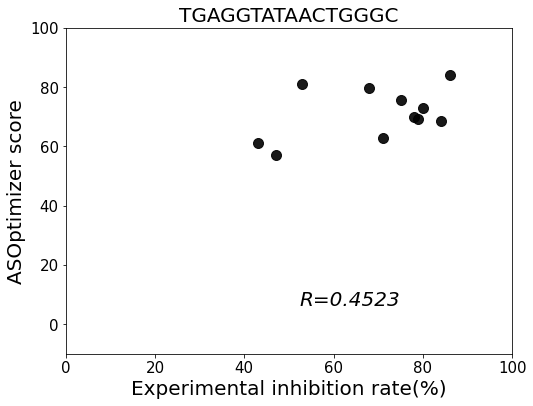

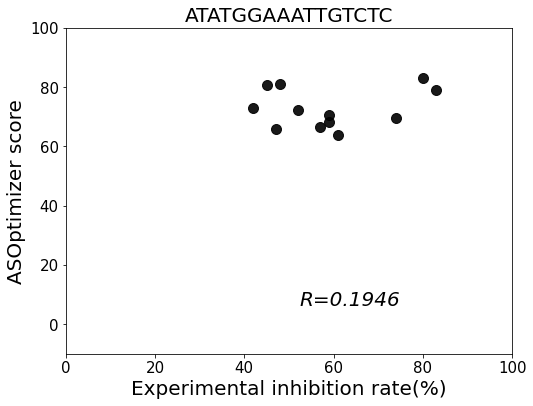

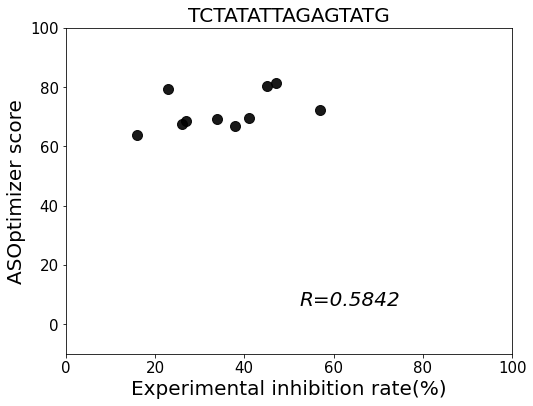

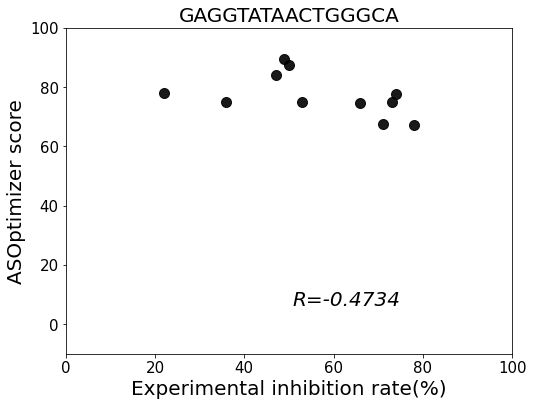

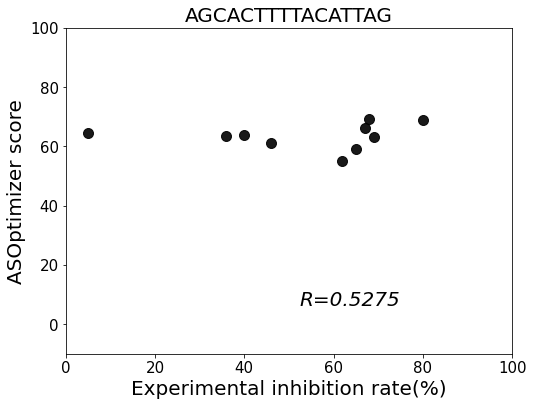

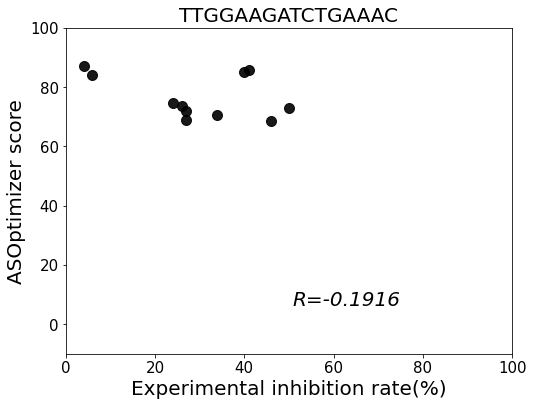

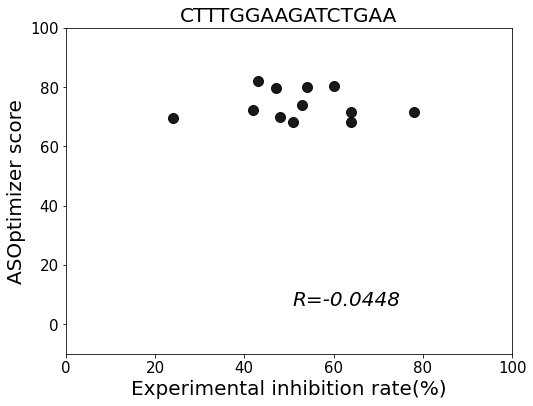

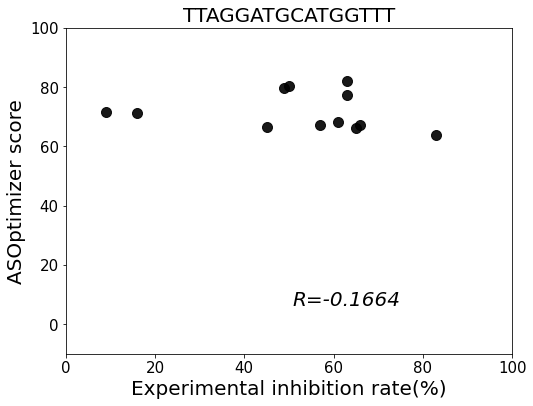

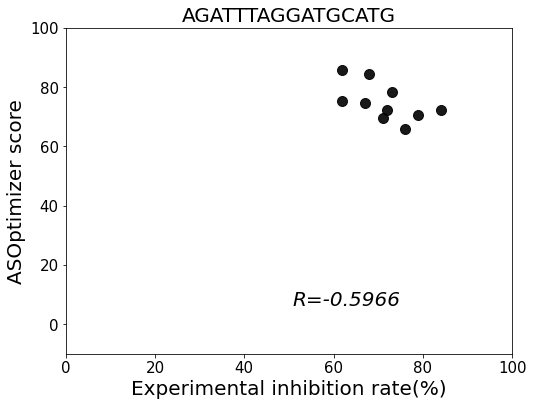

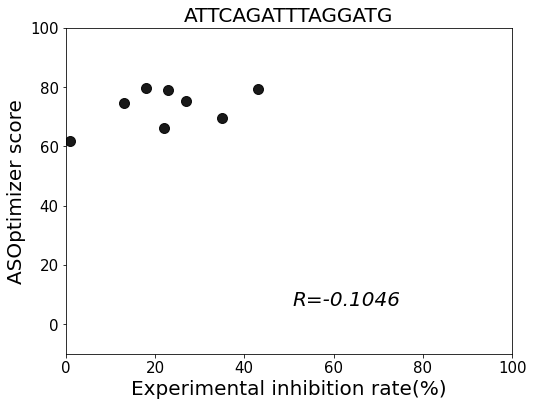

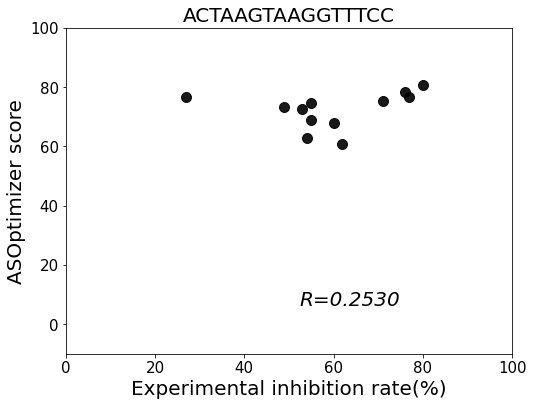

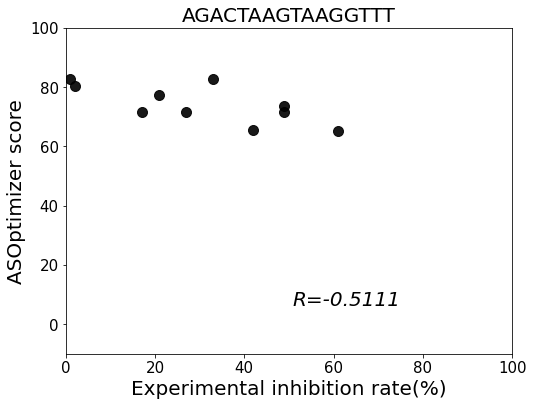

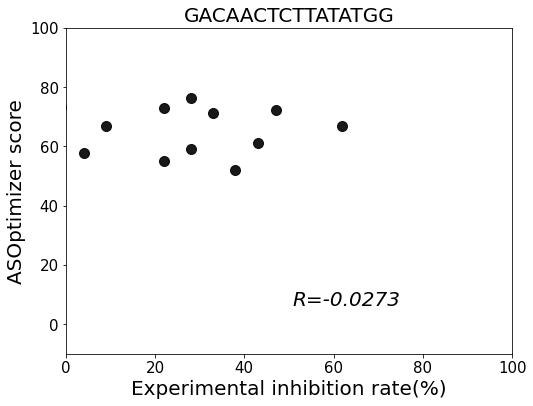

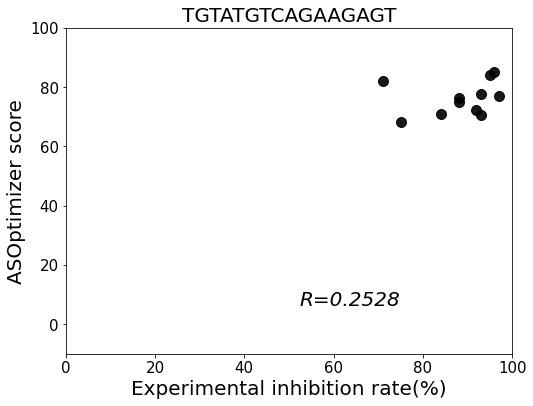

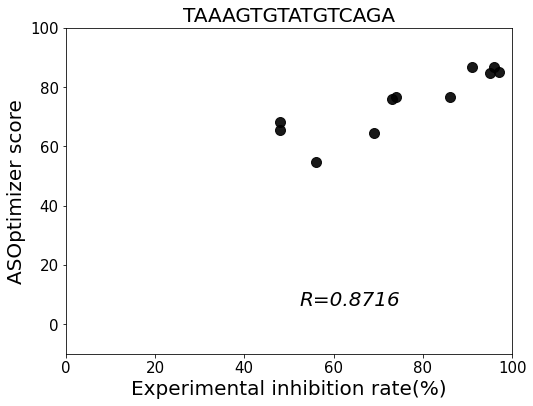

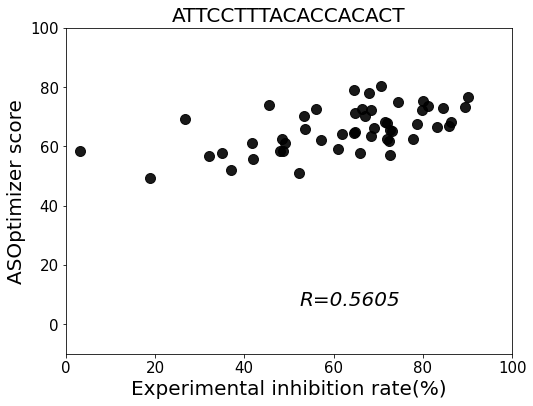

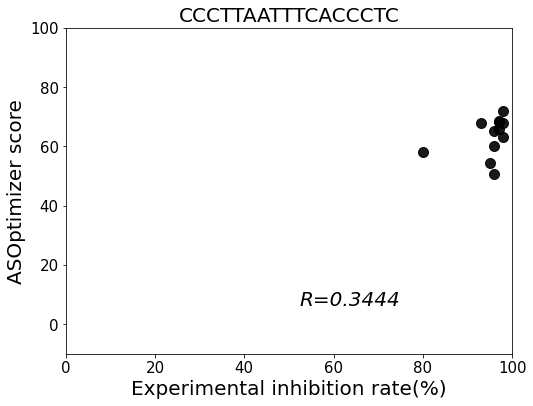

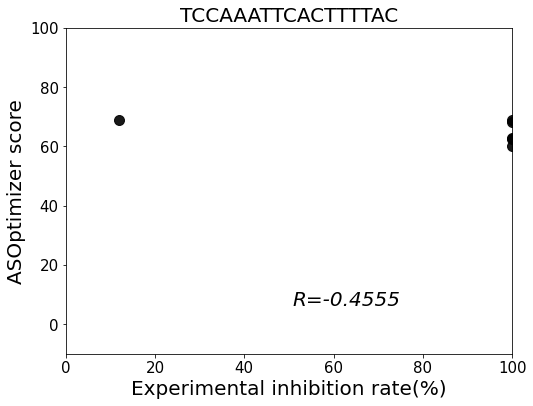

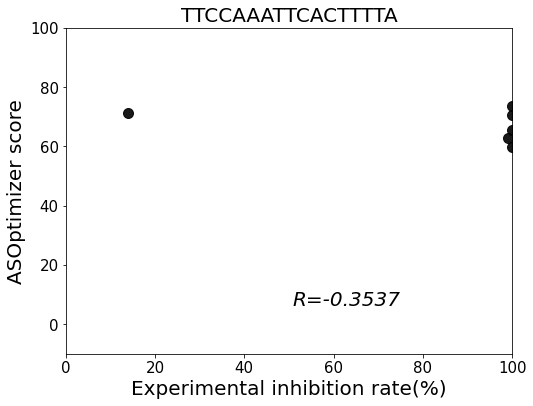

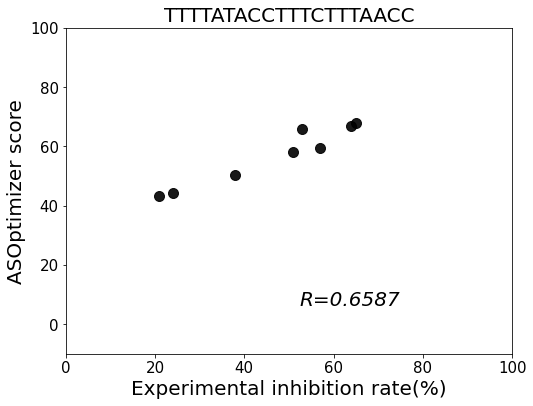

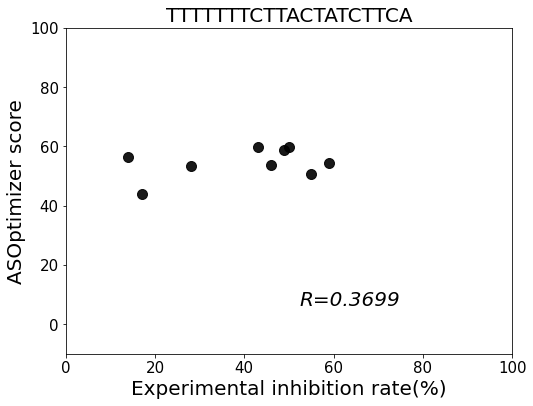

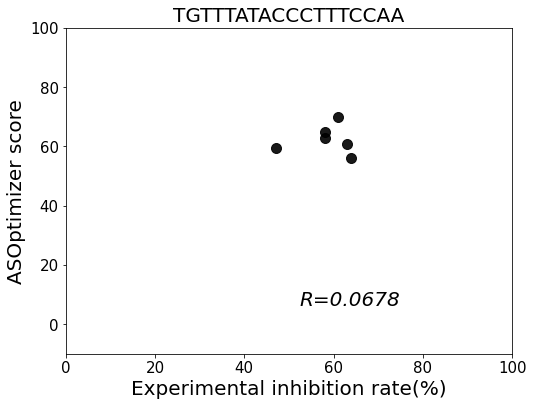

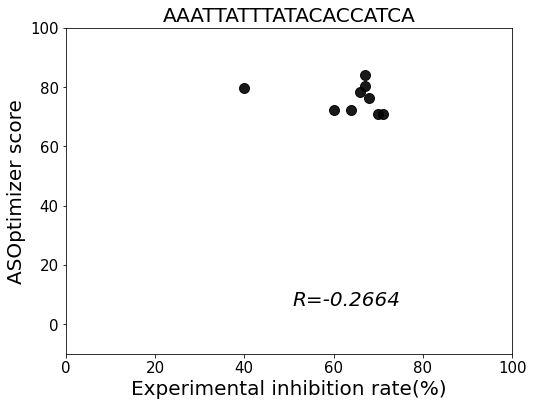

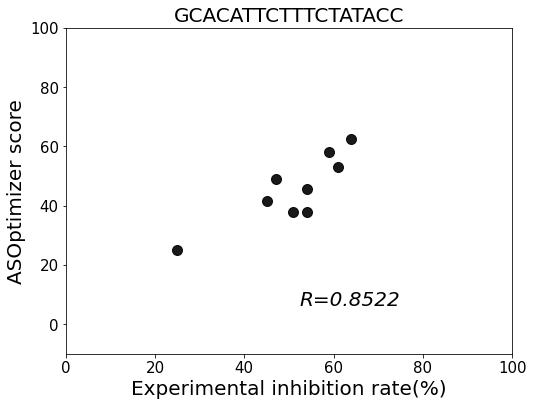

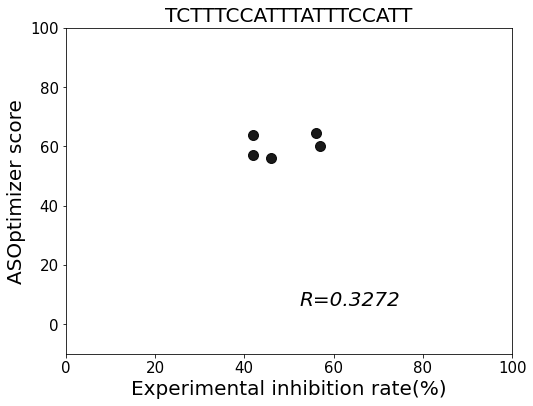

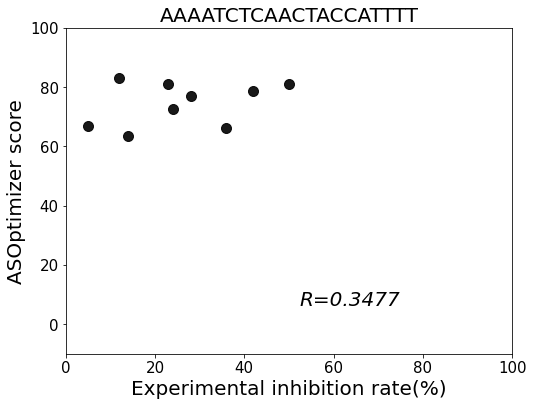

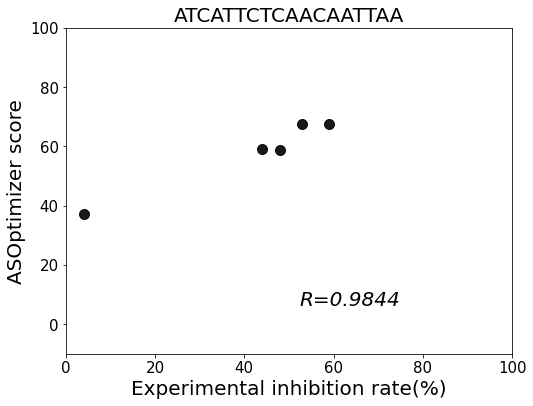

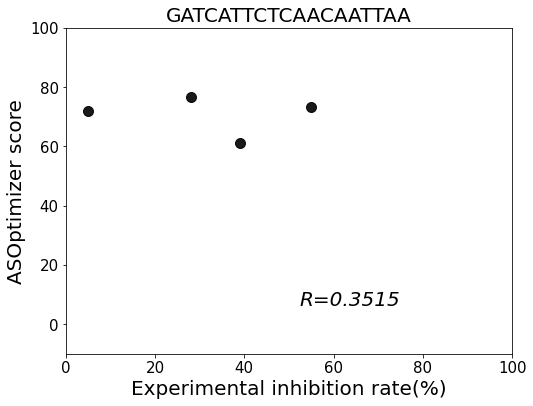

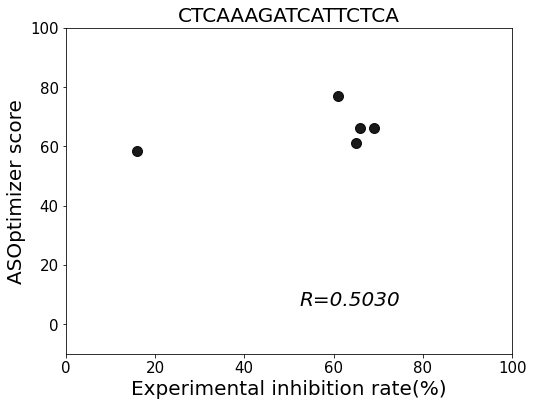

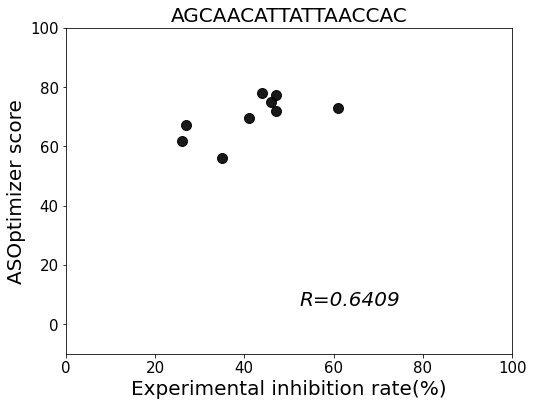

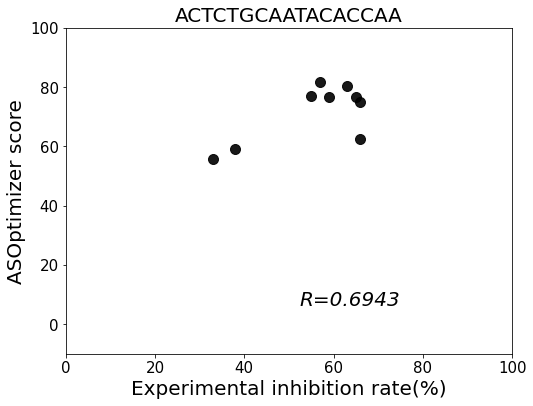

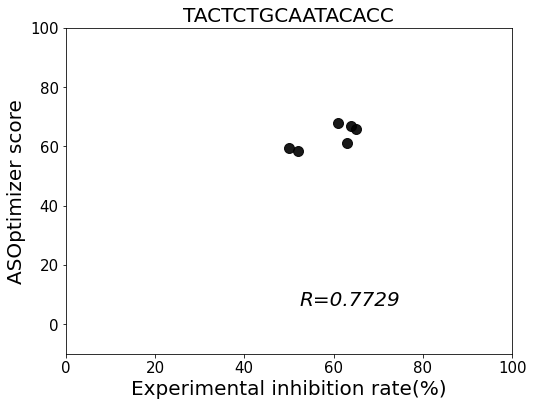

/home/dclab/hard/NAR2023/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in double_scalars


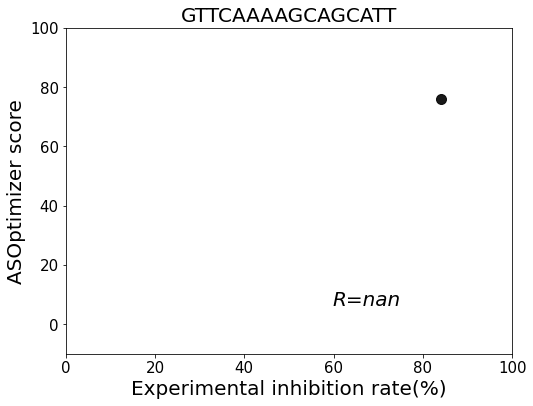

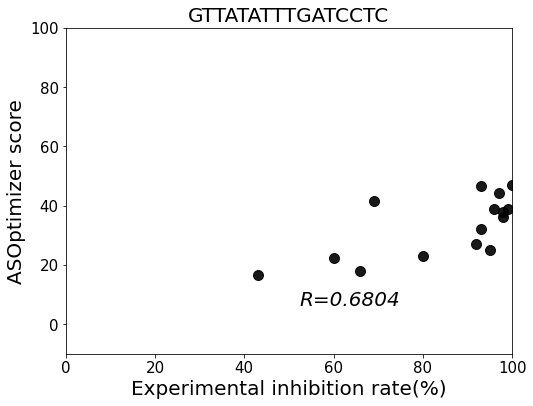

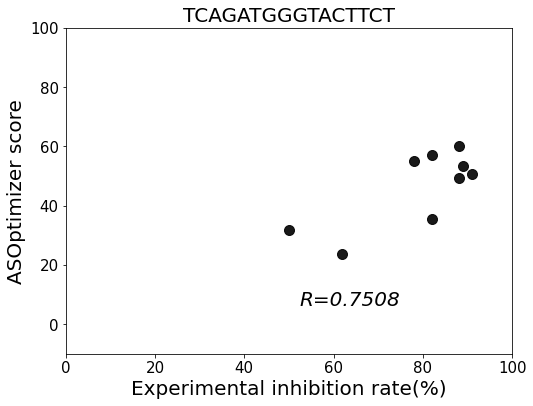

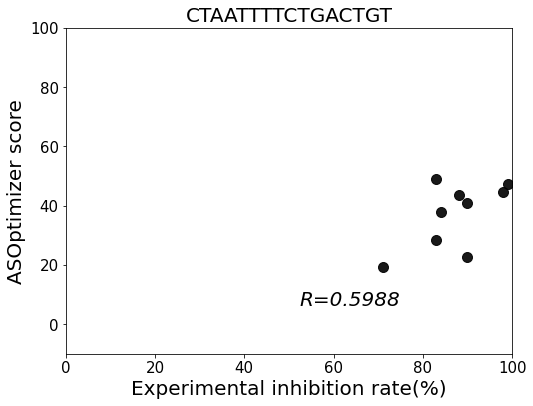

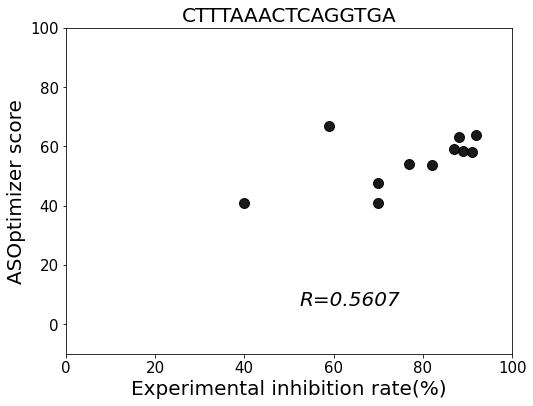

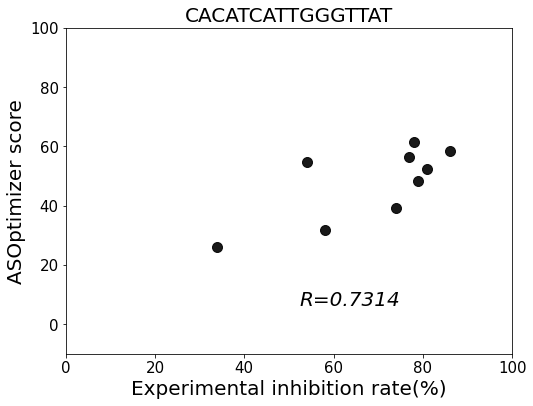

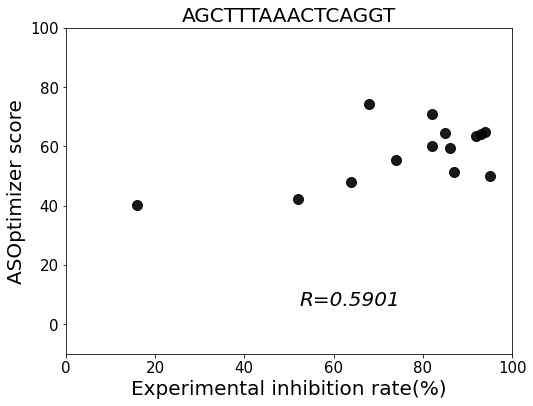

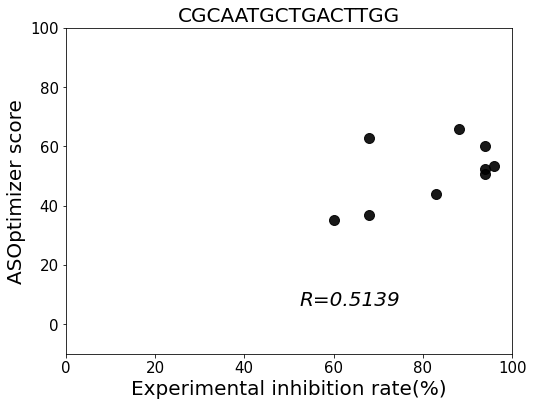

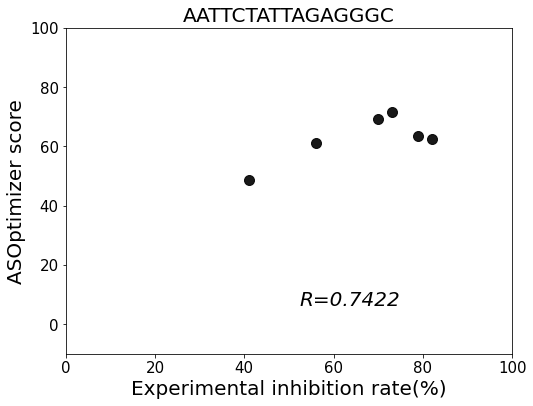

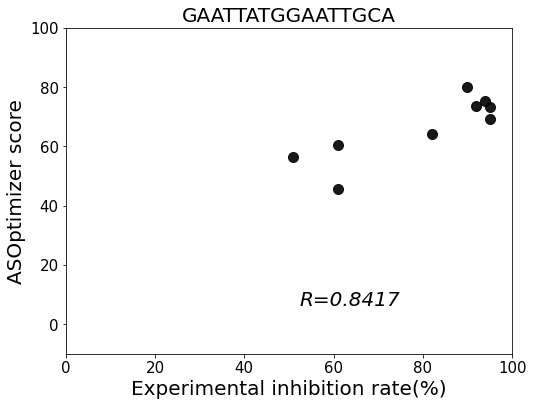

In [16]:
pos=0
seq_dict={}
Corrs=[]
lens=[]
idx=0
accs=[]
total_num=0
for ii in seqs:

    df_test_extract = df_test_exp[df_test_exp['Sequence']==ii].copy()
    df_test_extract['Merged_Column'] = df_test_extract[env_columns].apply(merge_columns, axis=1)

    df_test_extract['Duplicate_Count'] = df_test_extract['Merged_Column'].apply(count_duplicates)
    
    df_test_extracted = df_test_extract[df_test_extract['Duplicate_Count'] == df_test_extract['Duplicate_Count'].max()]
    df_test_extracted = df_test_extracted.copy()
    df_test_extracted['Inhibition(%)_mean'] = df_test_extracted.groupby('ISIS')['Inhibition(%)'].transform('mean')
    df_test_extracted = df_test_extracted.astype({'ISIS': 'int32'})
    
    qq=df_test_exp[df_test_exp['Sequence']==ii].ISIS.unique()
    df_preds=df_pred[df_pred['ids'].isin(qq)]
    ids=df_preds['ids'].values

    gt = np.zeros(len(df_preds))

    for jj in range(len(df_preds)):
        try: 
            gt[jj] = df_test_extracted[df_test_extracted['ISIS'] == ids[jj]].iloc[0]['Inhibition(%)_mean']
        except ValueError:
            gt[jj]='nan'
        except IndexError:
            gt[jj]='nan'
    
    df_preds = df_preds.copy()
    df_preds['gt'] = gt
    
    df_preds = df_preds[~df_preds['gt'].isnull()]

    preds = df_preds['Preds'].values
    gt = df_preds['gt'].values
    
    arg_preds = preds.argsort()
   
    preds_combinations_list = list(combinations(preds, 2))
    gt_combinations_list = list(combinations(gt, 2))

    gt_comparison_results = ["First is larger" if val1 > val2 else "Second is larger" for val1, val2 in gt_combinations_list]
    preds_comparison_results = ["First is larger" if val1 > val2 else "Second is larger" for val1, val2 in preds_combinations_list]
    comparison_results = [element1 == element2 for element1, element2 in zip(gt_comparison_results, preds_comparison_results)]
    converted_list = np.array([1 if item else 0 for item in comparison_results])
    
    acc=converted_list.sum()/len(converted_list)
    accs.append(acc)

    
    plt.figure(figsize=(8, 6))
    plt.rc('font', size=10)        # 기본 폰트 크기
    plt.rc('axes', labelsize=20) 
    # plt.rc('t', labelsize=20)  # x,y축 label 폰트 크기
    plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
    plt.rc('ytick', labelsize=15)  # y축 눈금 폰트 크기
    plt.rc('legend', fontsize=10)  # 범례 폰트 크기
    plt.rc('figure', titlesize=10) # figure title 폰트 크기

    Corr=df_preds.corr().values[0,1]
    Corrs.append(Corr)
    lens.append(len(df_preds))
    
    if Corr==-1:
        print(ii)

    plt.scatter(gt,100*preds, alpha=0.9,  c='k', s=100)
    plt.ylabel('ASOptimizer score')
    plt.title('{}'.format(ii),fontsize=20)
    plt.xlabel('Experimental inhibition rate(%)')
    plt.text(75, 5, f'R={Corr:.4f}', fontsize=20, ha='right',fontstyle='italic', va='bottom')
    plt.xlim([0, 100])
    plt.ylim([-10, 100])
    
    plt.savefig(insilico_path +'{}.png'.format(ii), dpi = 500)
    plt.show()
    idx+=1



In [17]:
Corrs = np.array(Corrs)
lens=np.array(lens)
accs=np.array(accs)
Corrs = np.array(Corrs)

Corrs_wonan = Corrs[~np.isnan(Corrs)]
lens_wonan = lens[~np.isnan(Corrs)]
accs_wonan = accs[~np.isnan(Corrs)]

lens_wonan=lens_wonan[Corrs_wonan.argsort()]
Corrs_wonan.sort()

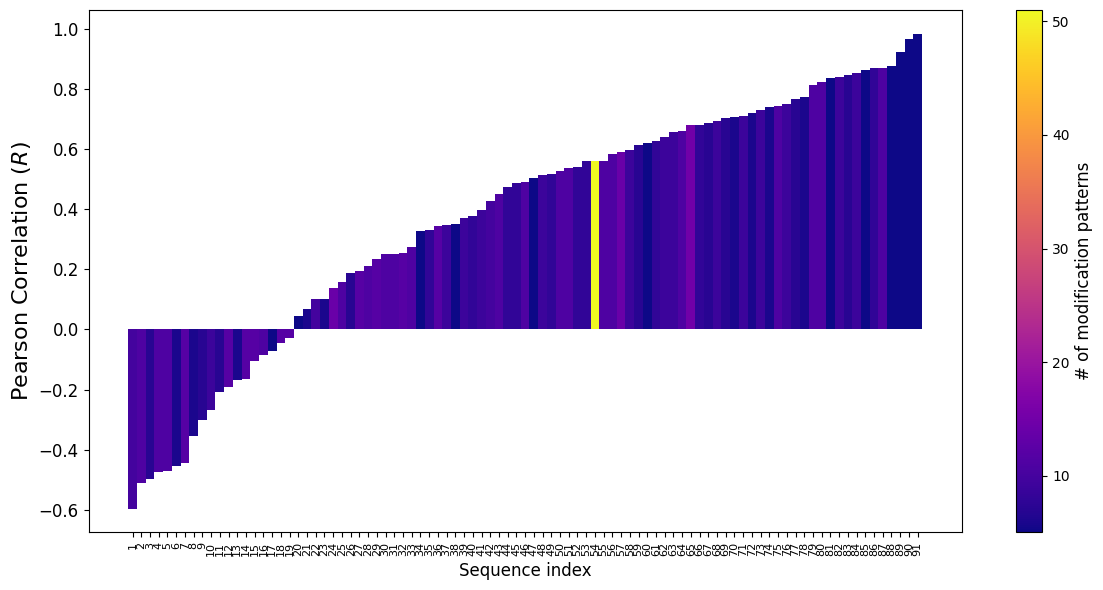

In [18]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(12, 6))
values = Corrs_wonan[1:]
counts = lens_wonan[1:]
categories = [f'{i+1}' for i in range(len(values))] 

bars = plt.bar(categories, values, color='black', width=1)

plt.xlabel('Sequence index', fontsize=12)
plt.ylabel('Pearson Correlation ($\it{R}$)', fontsize=16)

# plt.ylabel(r'$\textit{Pearson Correlation (R)}$', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.gcf().set_size_inches(12, 6)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)


norm = plt.Normalize(min(counts), max(counts))
for bar, value in zip(bars, counts):

    color = plt.cm.plasma(norm(value))

    bar.set_facecolor(color)

# Colorbar 설정
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm)
sm.set_array([])  
cbar = plt.colorbar(sm)
cbar.set_label('# of modification patterns', fontsize=12)

# 그래프 표시
plt.tight_layout()

plt.show()


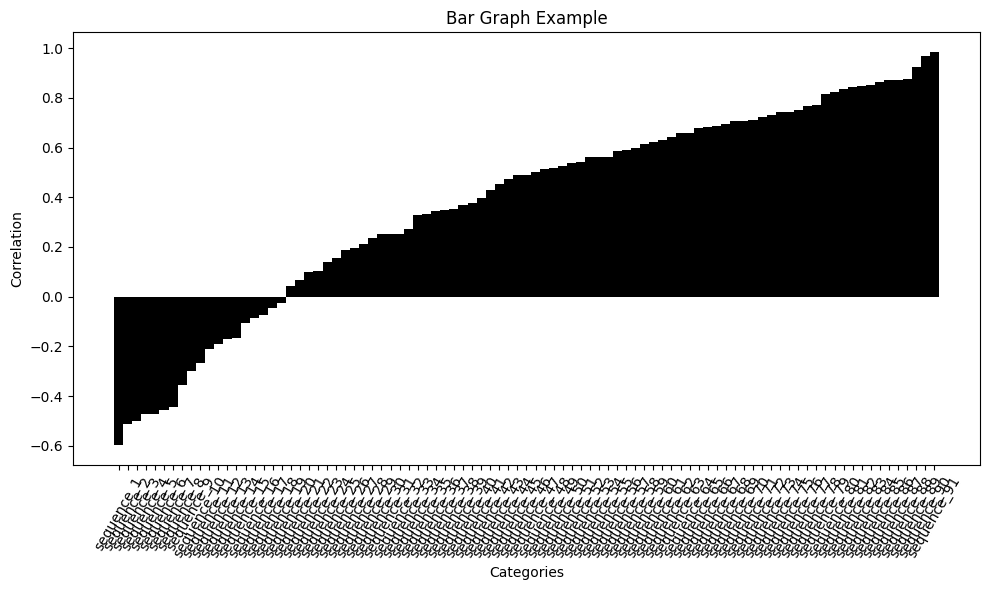

In [19]:
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(12, 8))
values = Corrs_wonan[1:]
categories = [f'sequence_{i+1}' for i in range(len(values))] 

plt.bar(categories, values, color='k', width=1)

plt.title('Bar Graph Example')
plt.xlabel('Categories')
plt.ylabel('Correlation')
plt.xticks(rotation=60, fontsize=10)
plt.gcf().set_size_inches(10, 6)


plt.tight_layout()
plt.show()